# Tesis Parte II

# Determinar mejor PCA


In [1]:
#importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.figsize'] = (20, 20)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#cargamos los datos de entrada
#data = pd.read_csv("cleaned_dataset_tesis_no_cluster.csv")
#dataframe = pd.read_csv(r"cleaned_dataset_tesis_no_cluster.csv")
dataframe = pd.read_csv(r"2-medicamentos-norm-fix.csv")
print(dataframe.tail(10))

      Column1  gender    age  admission_type_id  discharge_disposition_id  \
5167     5167       0  0.500           0.000000                  0.000000   
5168     5168       1  0.750           0.000000                  0.185185   
5169     5169       1  0.500           0.285714                  0.000000   
5170     5170       1  0.500           0.000000                  0.000000   
5171     5171       0  0.750           0.000000                  0.074074   
5172     5172       0  0.500           0.142857                  0.000000   
5173     5173       0  0.750           0.142857                  0.185185   
5174     5174       0  0.875           0.000000                  0.444444   
5175     5175       1  0.375           0.000000                  0.111111   
5176     5176       1  0.750           0.000000                  0.000000   

      admission_source_id  time_in_hospital  num_lab_procedures  \
5167             0.285714          0.230769            0.357143   
5168             0

# Quitamos la columna "Unnnamed:0 " del analisis de características

In [3]:
#diabetes_variables=diabetes.drop(['admission_type_id'], axis=1)
#diabetes_variables = diabetes

#dataframe=dataframe.drop(['Unnamed: 0'], axis=1)

dataframe=dataframe.drop(['Column1'], axis=1)

In [4]:
dataframe.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,Genitourinary,Injury,Musculoskeletal,Neoplasms,Other_1,Respiratory,InsulinDown,InsulinNo,InsulinSteady,InsulinUp
0,0,0.625,0.142857,0.000000,0.142857,0.461538,0.544643,0.000000,0.136986,0.0,...,0,0,0,1,0,0,0,0,1,0
1,1,0.375,0.000000,0.074074,0.285714,0.461538,0.526786,0.000000,0.191781,0.0,...,0,0,0,0,0,0,1,0,0,0
2,1,0.625,0.000000,0.000000,0.285714,0.384615,0.767857,0.000000,0.232877,0.0,...,1,0,0,0,0,0,0,0,1,0
3,0,0.750,0.285714,0.074074,0.142857,0.615385,0.008929,0.000000,0.150685,0.0,...,0,0,0,0,1,0,0,0,1,0
4,0,0.750,0.714286,0.000000,0.000000,0.384615,0.482143,0.166667,0.164384,0.0,...,0,0,0,0,0,0,0,1,0,0


# Vemos las caracteristicas del objeto

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    5177 non-null   int64  
 1   age                       5177 non-null   float64
 2   admission_type_id         5177 non-null   float64
 3   discharge_disposition_id  5177 non-null   float64
 4   admission_source_id       5177 non-null   float64
 5   time_in_hospital          5177 non-null   float64
 6   num_lab_procedures        5177 non-null   float64
 7   num_procedures            5177 non-null   float64
 8   num_medications           5177 non-null   float64
 9   number_outpatient         5177 non-null   float64
 10  number_emergency          5177 non-null   float64
 11  number_inpatient          5177 non-null   float64
 12  number_diagnoses          5177 non-null   float64
 13  max_glu_serum             5177 non-null   int64  
 14  A1Cresul

In [6]:
dataframe.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,Genitourinary,Injury,Musculoskeletal,Neoplasms,Other_1,Respiratory,InsulinDown,InsulinNo,InsulinSteady,InsulinUp
0,0,0.625,0.142857,0.000000,0.142857,0.461538,0.544643,0.000000,0.136986,0.0,...,0,0,0,1,0,0,0,0,1,0
1,1,0.375,0.000000,0.074074,0.285714,0.461538,0.526786,0.000000,0.191781,0.0,...,0,0,0,0,0,0,1,0,0,0
2,1,0.625,0.000000,0.000000,0.285714,0.384615,0.767857,0.000000,0.232877,0.0,...,1,0,0,0,0,0,0,0,1,0
3,0,0.750,0.285714,0.074074,0.142857,0.615385,0.008929,0.000000,0.150685,0.0,...,0,0,0,0,1,0,0,0,1,0
4,0,0.750,0.714286,0.000000,0.000000,0.384615,0.482143,0.166667,0.164384,0.0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
dataframe_variables = dataframe 
dataframe_norm = dataframe

# Ver los valores de los datos "Diabetes" ya normalizados 

In [8]:
dataframe_variables.describe()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,Genitourinary,Injury,Musculoskeletal,Neoplasms,Other_1,Respiratory,InsulinDown,InsulinNo,InsulinSteady,InsulinUp
count,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,...,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000
mean,0.522890,0.655592,0.152957,0.122200,0.235069,0.369266,0.421740,0.228736,0.243726,0.019782,...,0.039791,0.065868,0.060267,0.034962,0.196446,0.156268,0.107978,0.447556,0.332046,0.112420
std,0.499524,0.180586,0.208202,0.209731,0.202814,0.251508,0.167294,0.292223,0.127890,0.066190,...,0.195488,0.248076,0.238003,0.183702,0.397348,0.363144,0.310382,0.497290,0.470993,0.315913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.153846,0.330357,0.000000,0.150685,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.625000,0.000000,0.000000,0.285714,0.307692,0.428571,0.166667,0.219178,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.750000,0.285714,0.185185,0.285714,0.538462,0.535714,0.333333,0.301370,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#PARA NORMALIZADOS


#normalizamos los datos
#scaler=StandardScaler()
#df = dataframe.drop(['comprar'], axis=1) # quito la variable dependiente "Y"
#df = dataframe
#scaler.fit(df) # calculo la media para poder hacer la transformacion
#X_scaled=scaler.transform(df)# Ahora si, escalo los datos y los normalizo

X_scaled=dataframe_norm
#Instanciamos objeto PCA y aplicamos

pca=PCA(n_components=44) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA


In [10]:
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma: 2 ',sum(expl[0:2]))
print('suma: 3 ',sum(expl[0:3]))
print('suma: 4 ',sum(expl[0:4]))
print('suma: 5 ',sum(expl[0:5]))
print('suma: 6 ',sum(expl[0:6]))
print('suma: 7 ',sum(expl[0:7]))
print('suma: 8 ',sum(expl[0:8]))
print('suma: 9 ',sum(expl[0:9]))
print('suma: 10 ',sum(expl[0:10]))
print('suma: 11 ',sum(expl[0:11]))
print('suma: 12 ',sum(expl[0:12]))
print('suma: 13 ',sum(expl[0:13]))
print('suma: 15 ',sum(expl[0:15]))
print('suma: 20 ',sum(expl[0:20]))
print('suma: 25 ',sum(expl[0:25]))
print('suma: 27 ',sum(expl[0:27]))
print('suma: 30 ',sum(expl[0:30]))
print('suma: 32 ',sum(expl[0:32]))
print('suma: 33',sum(expl[0:33]))
print('suma: 35 ',sum(expl[0:35]))

# en normalización se aprecia lo siguiente

#Vemos que con 8 componentes tenemos algo mas del 66% de varianza explicada
#Vemos que con 9 componentes tenemos algo mas del 69% de varianza explicada
#Vemos que con 10 componentes tenemos algo mas del 73% de varianza explicada
#Vemos que con 11 componentes tenemos algo mas del 75% de varianza explicada
#Vemos que con 12 componentes tenemos algo mas del 78% de varianza explicada
#Vemos que con 13 componentes tenemos algo mas del 81% de varianza explicada
#Vemos que con 15 componentes tenemos algo mas del 85% de varianza explicada
#Vemos que con 20 componentes tenemos algo mas del 93% de varianza explicada

shape of X_pca (5177, 44)
[1.25049841e-01 9.66992570e-02 8.70973495e-02 7.70366071e-02
 6.85083230e-02 6.20201891e-02 5.46494400e-02 4.79510036e-02
 3.65581626e-02 3.48929817e-02 2.96438041e-02 2.35576440e-02
 2.27612903e-02 2.15440276e-02 2.05688198e-02 2.00028802e-02
 1.88085206e-02 1.62188681e-02 1.61668056e-02 1.31047677e-02
 1.23229207e-02 1.20420159e-02 1.16266810e-02 9.39648738e-03
 8.50226028e-03 7.67376294e-03 7.61373664e-03 5.50575661e-03
 5.35906762e-03 5.15303077e-03 4.41311327e-03 3.90992144e-03
 3.50305633e-03 2.40754393e-03 2.31461672e-03 2.08327443e-03
 1.32203978e-03 1.08421731e-03 5.20129132e-04 2.68588279e-04
 1.37197006e-04 2.46617327e-32 1.29454052e-33 8.01868017e-34]
suma: 2  0.22174909782231977
suma: 3  0.3088464473686546
suma: 4  0.3858830544413449
suma: 5  0.4543913774504178
suma: 6  0.5164115665350492
suma: 7  0.5710610065602475
suma: 8  0.6190120102019873
suma: 9  0.6555701727795621
suma: 10  0.6904631545199247
suma: 11  0.7201069586560499
suma: 12  0.7436646

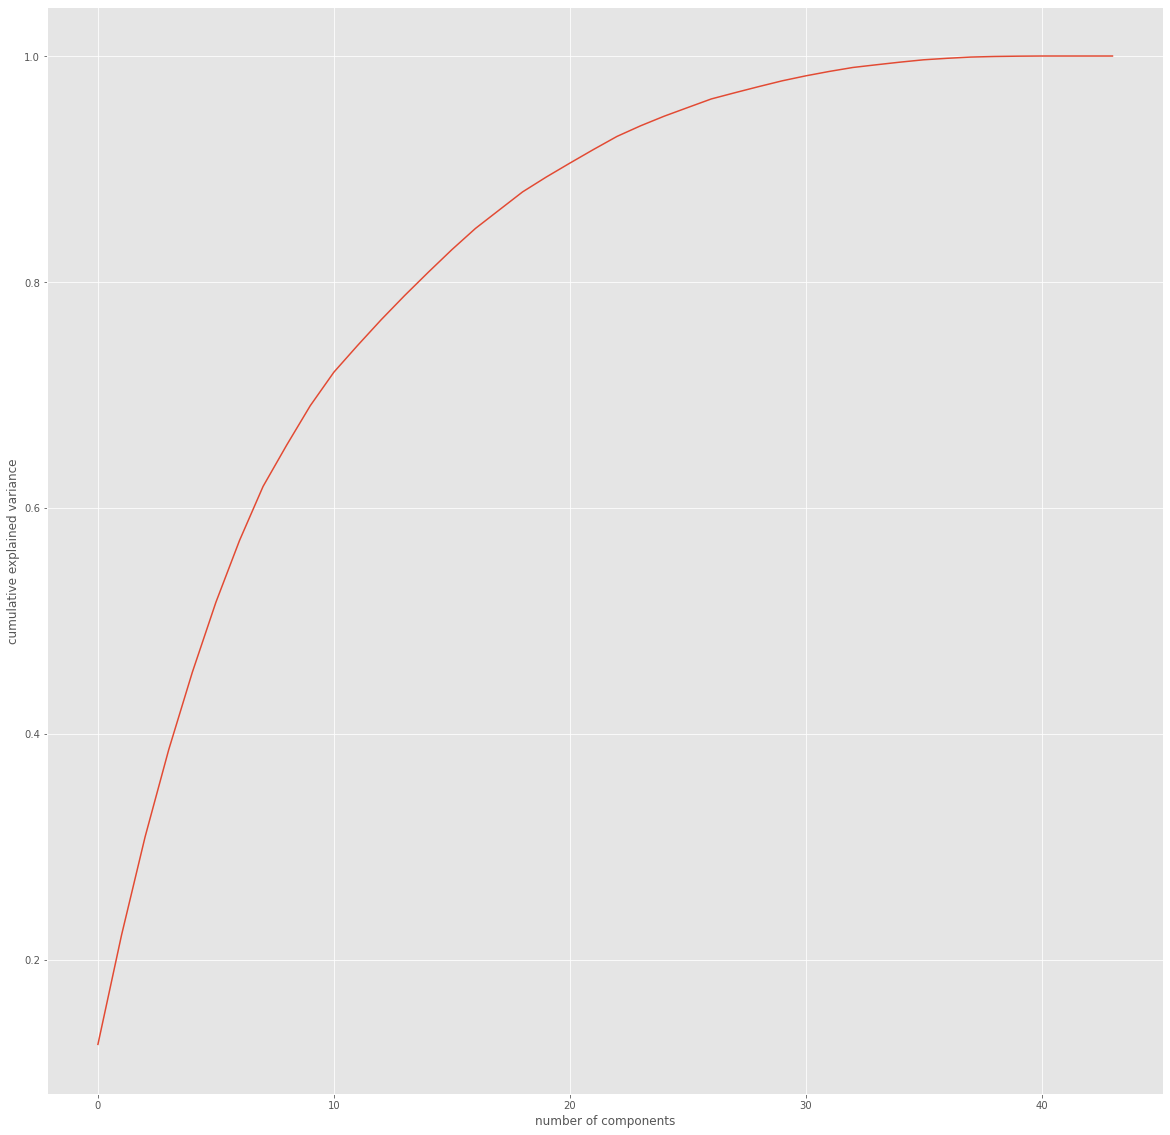

In [11]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones

plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.plot(np.cumsum(pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--'))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

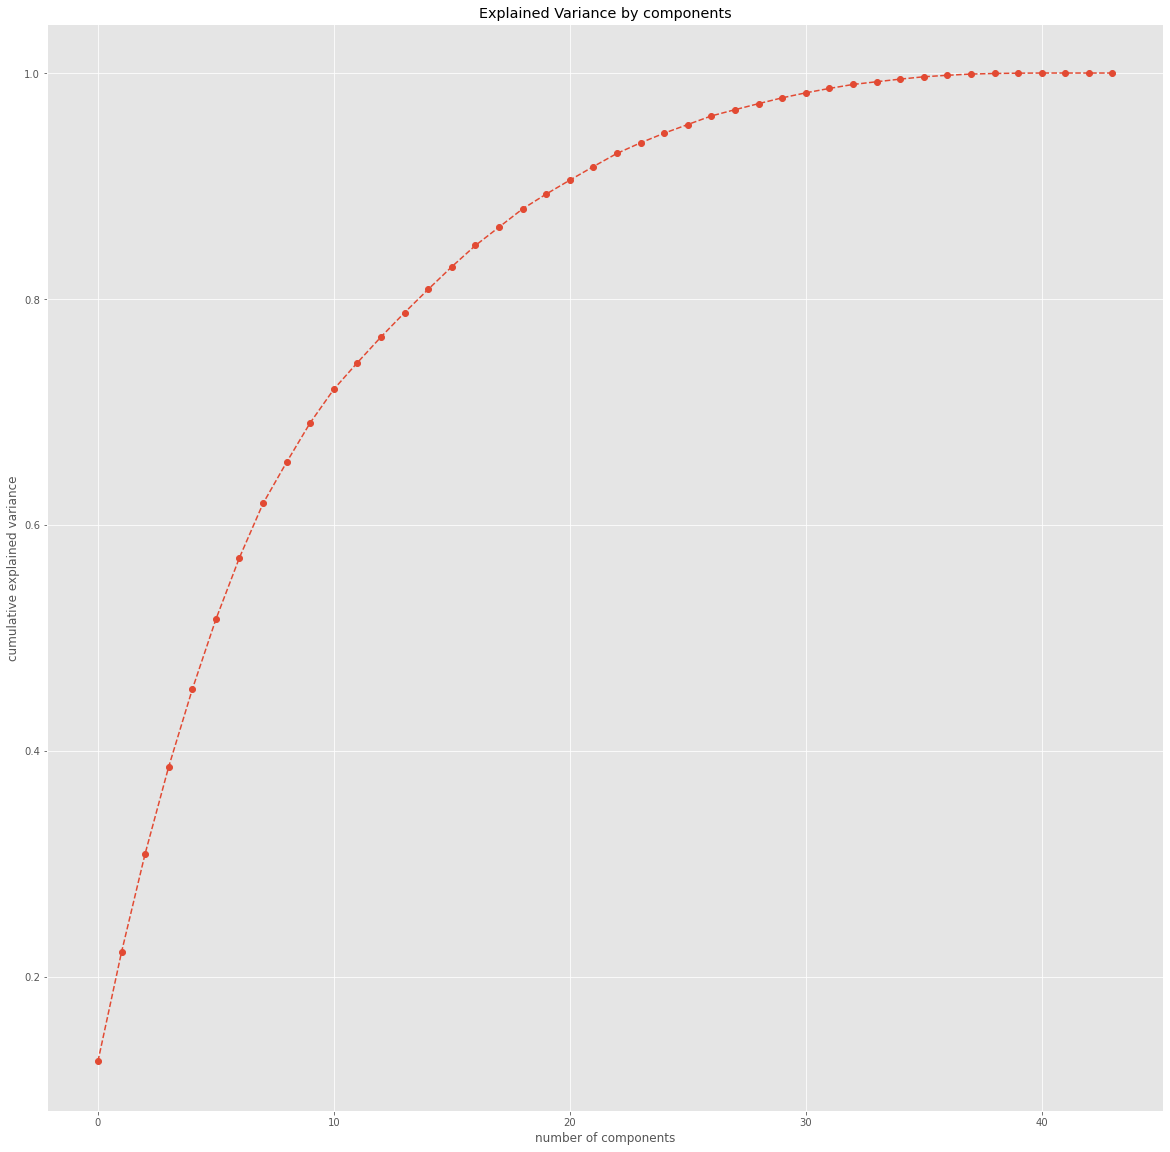

In [12]:
#Nueva Gráfica

plt.figure(figsize= (20,20))
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot( pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

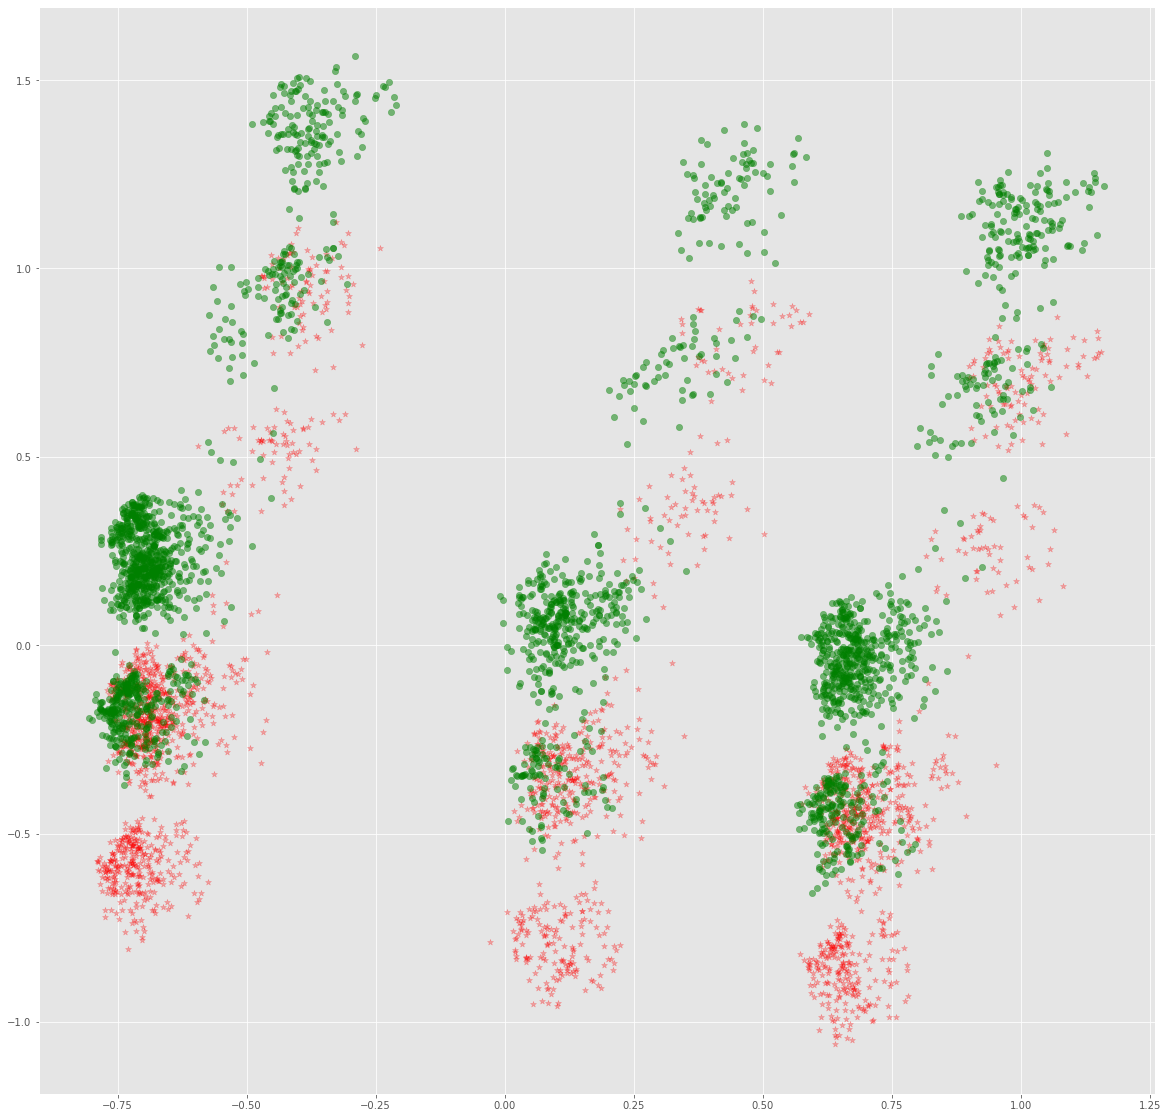

In [13]:
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=dataframe['gender'].values
cdict={0:'red',1:'green'}
labl={0:'A',1:'B'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(20,20))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])

No handles with labels found to put in legend.


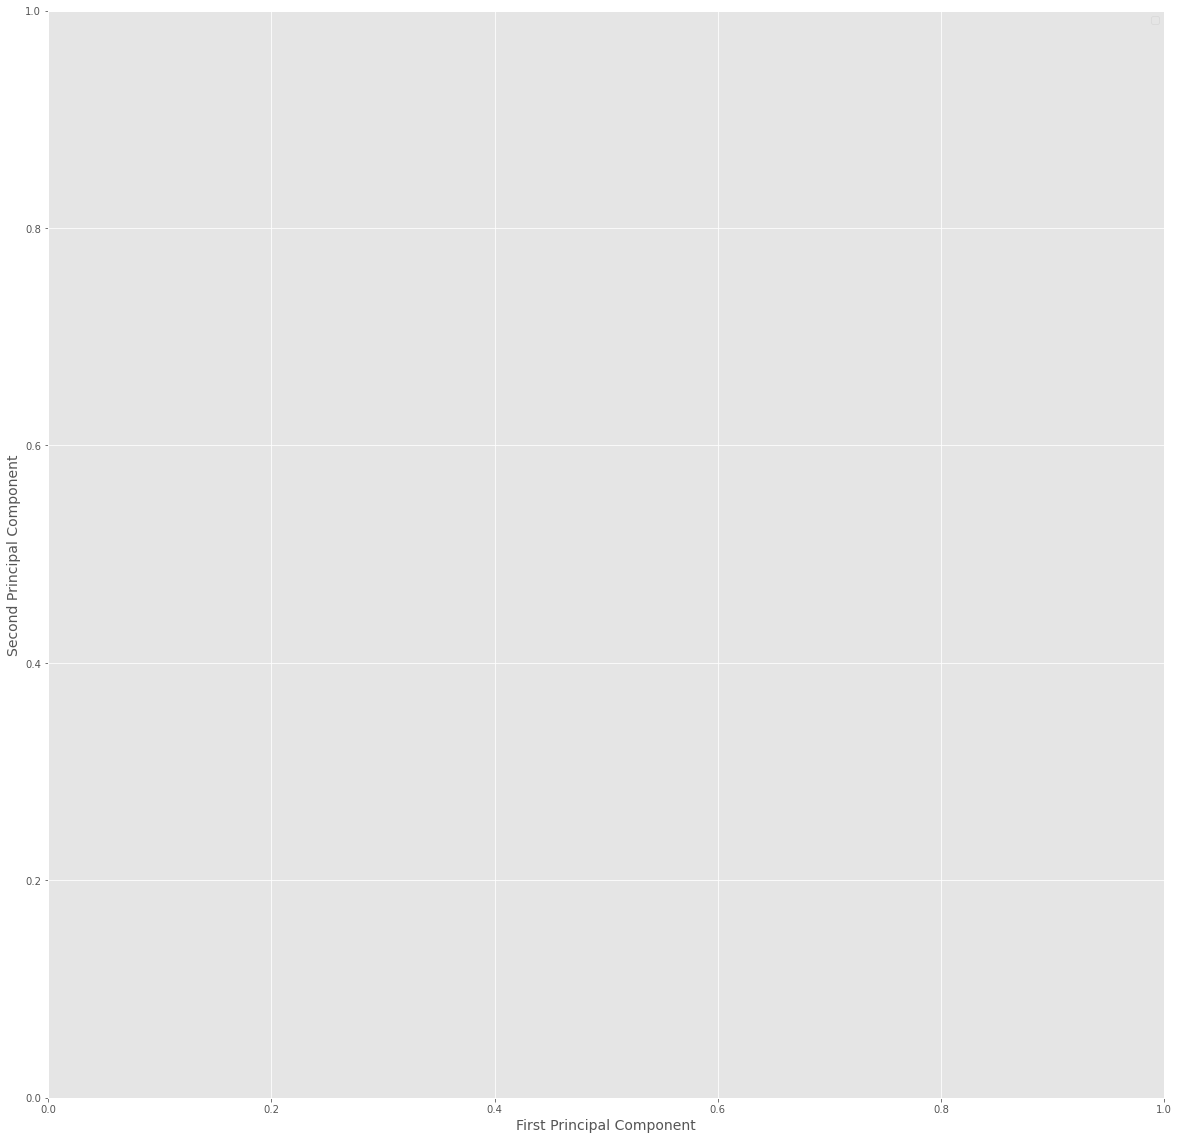

In [14]:
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()